*Python Executables*

In [1]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.6/bin/python3'

# K Nearest Neighbour

In [2]:
import pandas as pd
import numpy as np
from vega3 import VegaLite

## Prepare data

Here is the logic to generate our own clustered dataset. This is fairly simple. First the logic creates cluster center randomly. Then it generates points with a given standard deviation

In [3]:
# %load gen_points.py
import numpy as np
import random
import math

def gen_points(val_seed_xy=(80, 100), num_class=2, num_points=100, global_std=20):
    # cluster center
    centers = []
    for i in range(num_class):
        centers.append((val_seed_xy[0] * random.random(), val_seed_xy[1] * random.random()))
    
    # Points near centers
    X = np.empty(shape=[0, 2])
    y = np.empty(shape=[0, 1])
    for i in range(num_points):
        cls = num_class * random.random()
        cls = math.floor(cls)
        xcord = centers[cls][0] + global_std * random.random()
        ycord = centers[cls][1] + global_std * random.random()
        X = np.append(X, [[xcord, ycord]], axis=0)
        y = np.append(y, [[cls]], axis=0)
    
    return (X, y)

Here we have our own clusters of point. Now visualize it to check if the data which has been generated is according yo our expectation or not.

In [4]:
(X, y) = gen_points()

Now that we have our data ready, lets make a dataframe so that we can visualize it

In [5]:
columns = ["x", "y", "c"]
mat = np.hstack((X, y))
df = pd.DataFrame(mat, columns=columns)
df.head()

,x,y,c
0,60.269454,14.922161,0.0
1,57.801170,28.757373,0.0
2,78.436855,99.570628,1.0
3,50.308671,15.453435,0.0
4,88.598216,99.910545,1.0


Now lets visualize it

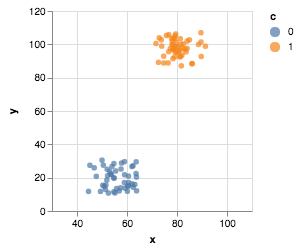

In [6]:
VegaLite({
    "mark": { "type": "point", "filled": "true" },
    "encoding": {
        "y": { 
            "type": "quantitative",
            "field": "y",
            "scale": { 
                "domain": [df['y'].min() - 10, df['y'].max() + 10]
            } 
        },
        "x": { 
            "type": "quantitative", 
            "field": "x", 
            "scale": { 
                "domain": [df['x'].min() - 10, df['x'].max() + 10]
            } 
        },
        "color": { "type": "nominal", "field": "c" }
    }
}, df)

Looks like we can apply clear classification with this dataset.

*You can optionally save the dataset if you want*

In [9]:
df.to_csv('gen-data.csv', index=False)

## Algorithm

The algorithm is pretty simple. The visual illustration of the algorithm is here [link goes here]

In [ ]:
%load knn

Now that our KNN algorithm is ready. Lets use it with our existing dataset

In [8]:
import knn_algo as knnalgo
knn = knnalgo.KNN(3) # 3 Nearest neighbour
knn.train(X, y)
knn.predict(np.array([[10, 100], [10, 10]]))

array([1., 0.])

Its classifying our data correctly.